In [1]:
%pylab inline
import csv
import seaborn as sns
sns.set_context('talk')

Populating the interactive namespace from numpy and matplotlib


In [8]:
def load_metadata(exp_key, prefix = './', print_meta = True):
    '''
    Loads the metadata, which contains all the parameters used for the simulation
    BE CAREFUL: The parameters are set as global variables!!
    If print_meta == True, it prints the values of the imported parameters
    '''
    
    infile =open(prefix+'exp_'+exp_key+'_meta.csv', mode='r')
    reader = csv.reader(infile)
    meta = list(reader)
    infile.close()
    
    global mTa, sTa, k, n0, tg, MTs_start, MTs_stop, MTs_step, STs_start, STs_stop, STs_step
    
    mTa = float(meta[0][1])
    sTa = float(meta[1][1])
    k = int(meta[2][1])
    n0 = int(meta[3][1])
    tg = int(meta[4][1])
    MTs_start = float(meta[5][1])
    MTs_stop = float(meta[6][1])
    MTs_step = float(meta[7][1])
    STs_start = float(meta[8][1])
    STs_stop = float(meta[9][1])
    STs_step = float(meta[10][1])
    if print_meta:
        print(meta)
    
    return meta

def plot_heatmap(MTs, STs, MN, mTa):
    
    #Indices of E(T_s) values for max fitness as a function of std
    max_MTs_vs_std = np.argmax(MN, axis=0)
    #Indices of std(T_s) values for max fitness as a function of E(T_s)
    max_STs_vs_mean = np.argmax(MN, axis=1)

    plt.figure(figsize=(8,5))
    y_conv = np.arange(len(max_MTs_vs_std))
    plt.plot(max_MTs_vs_std+0.5, y_conv+0.5, '--')
    x_conv = np.arange(len(max_STs_vs_mean))
    plt.plot(x_conv+0.5, max_STs_vs_mean+0.5, '--')
    # ax = sns.heatmap(MN.T/n0, yticklabels=STs, xticklabels=MTs)
    ax = sns.heatmap(MN.T/n0, yticklabels=False, xticklabels=False)
    plt.vlines(np.where(abs(MTs-3) <= 0.05/2)[0][0]+0.5, 0,len(y_conv), color='r', linestyles='--')
    ax.invert_yaxis()
    plt.ylabel('Standard deviation')
    plt.xlabel('Mean lag time')
    plt.title('$t_a=$'+str(mTa))
    
def plot_max_lines(MTs, STs, MN, mTa):

    #Indices of E(T_s) values for max fitness as a function of std
    max_MTs_vs_std = np.argmax(MN, axis=0)
    #Indices of std(T_s) values for max fitness as a function of E(T_s)
    max_STs_vs_mean = np.argmax(MN, axis=1)
    
    fig, axs = plt.subplots(1,2, figsize=(7,3.5), tight_layout=True)

    axs[0].plot(STs, MTs[max_MTs_vs_std], 'o-')
    axs[0].set_xlabel('$\sigma(T_s)$')
    axs[0].set_ylabel('$E(T_s)$ for max. fitness')

    axs[1].plot(MTs, [STs[e] for e in max_STs_vs_mean], 'o-')
    axs[1].set_xlabel('$E(T_s)$')
    axs[1].set_ylabel('$\sigma(T_s)$ for max. fitness')

### Imports, plot heatmap and maxlines for a single experiment

[['mTa', '3'], ['sTa', '0.5'], ['k', '10000'], ['n0', '1000'], ['tg', '8'], ['MTs_start', '1'], ['MTs_stop', '8'], ['MTs_step', '0.05'], ['STs_start', '0'], ['STs_stop', '2'], ['STs_step', '0.05']]


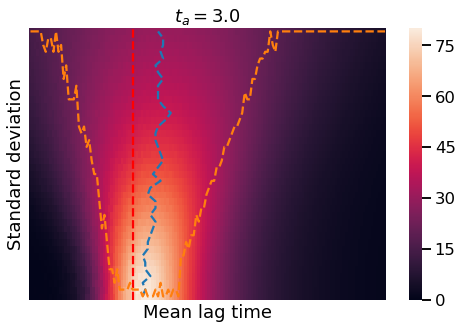

/home/gutiloluis/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


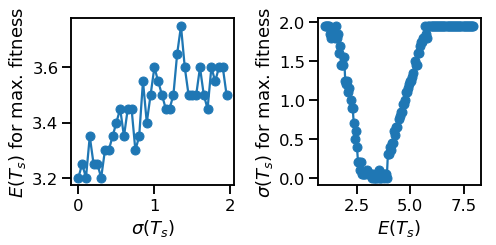

In [16]:
# DEFINE
exp_key = '210'
prefix = './data/'

meta = load_metadata(exp_key, prefix)

MTs = np.arange(MTs_start,MTs_stop,MTs_step)
STs = np.arange(STs_start,STs_stop,STs_step)

res = np.load(prefix+'exp_'+exp_key+'.npy')

MN = res[:,:,0].T
VN = res[:,:,3].T



plot_heatmap(MTs, STs, MN, mTa)
plot_max_lines(MTs, STs, MN, mTa)

In [12]:
MTs

array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05,
       2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 ,
       2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15,
       3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 ,
       3.75, 3.8 , 3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25,
       4.3 , 4.35, 4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 ,
       4.85, 4.9 , 4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35,
       5.4 , 5.45, 5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 ,
       5.95, 6.  , 6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45,
       6.5 , 6.55, 6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  ,
       7.05, 7.1 , 7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.5 , 7.55,
       7.6 , 7.65, 7.7 , 7.75, 7.8 , 7.85, 7.9 , 7.95])

In [14]:
MN[:,0]

array([    0.        ,   104.31497282,     0.        ,     0.        ,
         359.13891666,   427.02938126,   324.96233007,   309.11373021,
         808.60470817,   559.39533905,   931.19828626,  1518.48550275,
        1324.05908332,  2003.72448155,  2396.11640455,  3211.67951294,
        3794.16761642,  4452.81517443,  5216.53590997,  7803.67975282,
        9319.20512968, 10207.83881903, 14126.95000639, 15313.03617911,
       18727.98504688, 20642.32638077, 23999.05229765, 28059.56767682,
       32478.21153188, 35575.95398177, 39982.66173197, 43199.91559246,
       46296.08162829, 49219.15921144, 54371.41022716, 59666.29865439,
       62158.25173899, 66472.33951715, 69282.85364347, 70350.52923692,
       74755.70823996, 76206.24552481, 78223.79666647, 77474.54644163,
       80160.42243711, 80019.00017817, 79436.83209666, 79421.83804726,
       78572.71249399, 77191.65546249, 76478.55475293, 74075.8692563 ,
       72360.95172197, 69908.81709747, 67671.15057498, 65275.149436  ,
      

In [20]:
max(MN[:,0])/n0

80.16042243710935

In [33]:
STs

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])

### Plot errorbars

[['mTa', '3'], ['sTa', '0.25'], ['k', '10000'], ['n0', '1000'], ['tg', '8'], ['MTs_start', '1'], ['MTs_stop', '8'], ['MTs_step', '0.05'], ['STs_start', '0'], ['STs_stop', '2'], ['STs_step', '0.05']]


/home/gutiloluis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


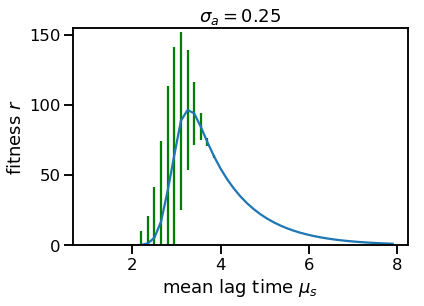

In [54]:
# DEFINE
exp_key = '205'
prefix = './data/'

meta = load_metadata(exp_key, prefix)

MTs = np.arange(MTs_start,MTs_stop,MTs_step)
STs = np.arange(STs_start,STs_stop,STs_step)

res = np.load(prefix+'exp_'+exp_key+'.npy')

MN = res[:,:,0].T
VN = res[:,:,3].T

# plot_heatmap(MTs, STs, MN, mTa)
# plot_max_lines(MTs, STs, MN, mTa)

# plt.plot(MTs, MN[:,0]/n0, c = 'r', linewidth = 5)
skipt = 3
plt.errorbar(MTs[::skipt], MN[::skipt,0]/n0, np.sqrt(VN[::skipt,0])/n0, ecolor='g')
# plt.vlines(3, 0, 155)
# plt.xlim([2,4])
plt.ylim([0,155])
plt.title("$\sigma_a=$"+str(sTa))
plt.xlabel('mean lag time $\mu_s$')
plt.ylabel('fitness $r$')
plt.savefig('ebars_0p25.png', bbox_inches='tight')

It looks smaller than Ta, but it is very noisy! Let's see what happens if I increase n0 to 1,000

## Max of the max

In [10]:
#Indices of E(T_s) values for max fitness as a function of std
max_MTs_vs_std = np.argmax(MN, axis=0)
#Indices of std(T_s) values for max fitness as a function of E(T_s)
max_STs_vs_mean = np.argmax(MN, axis=1)

In [95]:
def get_max_of_max(prefix, exp_key):
    '''
    Get the numbers associated with the values of parameters that yield the maximum fitness.
    
    '''
    
    meta = load_metadata(exp_key, prefix, print_meta = False)

    MTs = np.arange(MTs_start,MTs_stop,MTs_step)
    STs = np.arange(STs_start,STs_stop,STs_step)

    res = np.load(prefix+'exp_'+exp_key+'.npy')

    MN = res[:,:,0].T
    VN = res[:,:,3].T

    max_col_ind = np.argmax(np.max(MN, axis = 1))
    max_row_ind = np.argmax(np.max(MN, axis = 0))
    
#     max_MTs_vs_std = np.argmax(MN, axis=0)
#     plt.plot(STs, MTs[max_MTs_vs_std], '-o', label = str(sTa))
    
    mean_max_fit = MTs[max_col_ind] # Mean lag time that yields max fitness
    std_max_fit = STs[max_row_ind] # Std of lag times that yields max fitness
    
    max_fit = MN[max_col_ind, max_row_ind] # Final population that yields max fitness
    max_fit_var = np.sqrt(VN[max_col_ind, max_row_ind]) # Variance in final population that yields max fitness

    return mean_max_fit, std_max_fit, max_fit, max_fit_var

### Max of the max for a single experiment

In [96]:
exp_key = '205'
prefix = './data/'
mean_max_fit, std_max_fit, max_fit, max_fit_var = get_max_of_max(prefix, exp_key)
print(mean_max_fit, std_max_fit, max_fit, max_fit_var)

3.300000000000002 0.0 97391.20535808516 34969.14024860757


### Max of the max for several experiments

/home/gutiloluis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'Mean lag time for max. fitness')

/home/gutiloluis/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


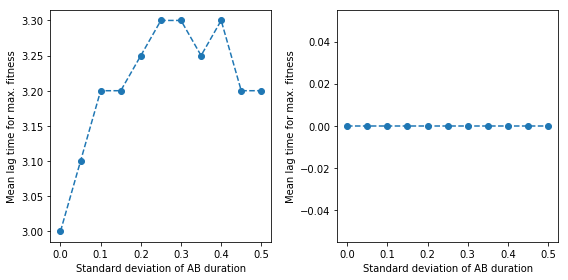

In [106]:
# Now for many experiments
EXP_KEY = np.arange(11).tolist()
for i in range(len(EXP_KEY)):
    EXP_KEY[i] = '{:3d}'.format(EXP_KEY[i]+200)
# for i in range(len(STa)):
EXP_KEY

prefix = './data/'

Mean_max_fit, Std_max_fit, Max_fit, Max_fit_var, STa = np.zeros(len(EXP_KEY)), np.zeros(len(EXP_KEY)), np.zeros(len(EXP_KEY)), np.zeros(len(EXP_KEY)), np.zeros(len(EXP_KEY)),
for i in range(len(EXP_KEY)):
    exp_key = EXP_KEY[i]
    mean_max_fit, std_max_fit, max_fit, max_fit_var = get_max_of_max(prefix, exp_key)
    STa[i] = sTa
    Mean_max_fit[i], Std_max_fit[i], Max_fit[i], Max_fit_var[i] = mean_max_fit, std_max_fit, max_fit, max_fit_var

fig, ax = plt.subplots(1, 2, figsize=(8,4),tight_layout=True)
ax[0].plot(STa, Mean_max_fit, 'o--')
ax[0].set_xlabel('Standard deviation of AB duration')
ax[0].set_ylabel('Mean lag time for max. fitness')

ax[1].plot(STa, Std_max_fit, 'o--')
ax[1].set_xlabel('Standard deviation of AB duration')
ax[1].set_ylabel('Mean lag time for max. fitness')

## SANDBOX STARTS HERE